In [1]:
import numpy as np

from scipy.integrate import solve_ivp, odeint
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

import matplotlib.gridspec as gridspec

%matplotlib nbagg

/home/amaury/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [38]:
a1 = 1.5
b1 = -0.5
c1 = 0.3
d1 = -0.1
e12 = -0.1
tau = 50

y = np.linspace(-0.3,1.5,1000)
T = -(-y**3+ a1*y**2+b1*y+c1)/d1

In [39]:
def f(t,y):

    F= forcing_freshwater(t)
    T= forcing_temperature(t)

    dy= np.zeros(1)

    dy[0] = (-y[0]**3+ a1*y[0]**2+b1*y[0]+c1+d1*T+e12*F)/tau
    
    return dy

In [ ]:
n = int((tend-t0)/dt)+1 ; teval=np.linspace(t0,tend,n)

if kwargs['int_method'] == 'RK45' : 
    sol=solve_ivp(f, [t0,tend], y0,method= 'RK45',rtol=10**-6,t_eval=teval)

## Exp 1 (F constant)

In [40]:
t0 = 0
tend = 40000
dt=1

forcing_freshwater = interpolate.interp1d([t0,tend],[0,0],bounds_error= False, fill_value=0)
forcing_temperature = interpolate.interp1d([t0,(t0+tend)/2,tend],[0,4,0],bounds_error= False, fill_value=0)


n = int((tend-t0)/dt)+1 ; teval=np.linspace(t0,tend,n)

y0 = [1.3]

sol= solve_ivp(f, [t0,tend], y0,method= 'RK45',rtol=10**-6,t_eval=teval)

<IPython.core.display.Javascript object>


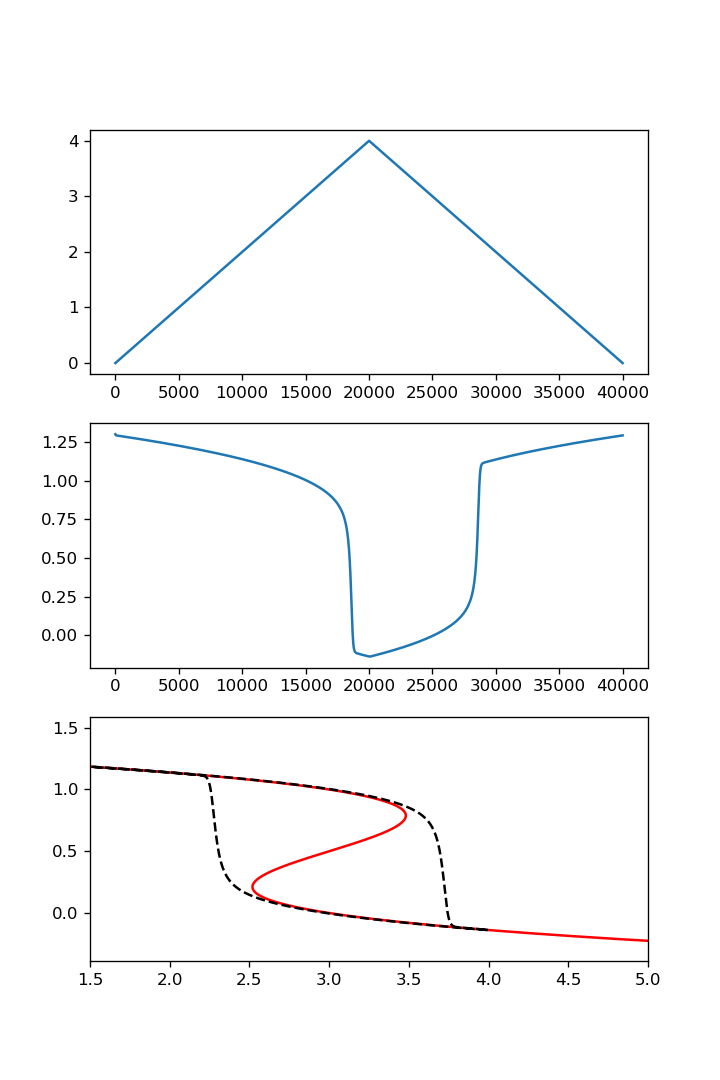

(1.5, 5.0)

In [41]:
fig,[ax,ax2,ax3]=plt.subplots(3,1,figsize=(6,9))

ax3.plot(T,y,'r')

ax.plot(sol.t,forcing_temperature(sol.t))
ax2.plot(sol.t, sol.y[0])
ax3.plot(forcing_temperature(sol.t),sol.y[0],'k--')


ax3.set_xlim((1.5,5))



## Exp 2 (T constant)

In [42]:
t0 = 0
tend = 40000
dt=1

forcing_freshwater = interpolate.interp1d([t0,(t0+tend)/2,tend],[0,4,0],bounds_error= False, fill_value=0)
forcing_temperature = interpolate.interp1d([t0,tend],[0,0],bounds_error= False, fill_value=0)


n = int((tend-t0)/dt)+1 ; teval=np.linspace(t0,tend,n)

y0 = [1.3]

sol= solve_ivp(f, [t0,tend], y0,method= 'RK45',rtol=10**-6,t_eval=teval)

<IPython.core.display.Javascript object>


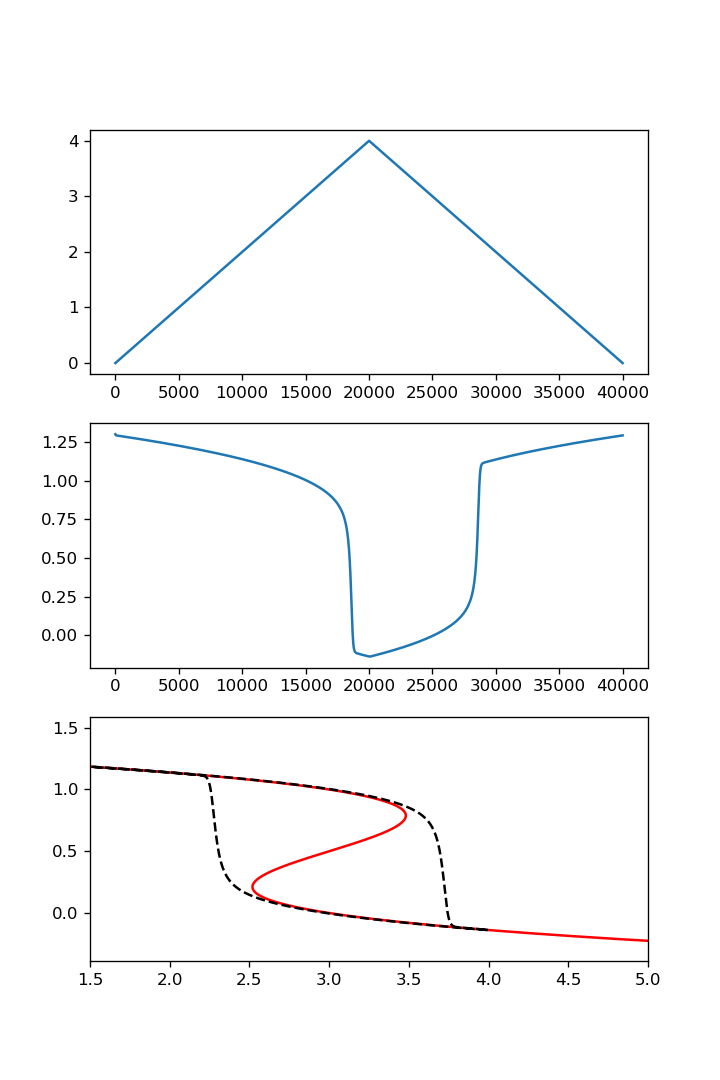

(1.5, 5.0)

In [43]:
fig,[ax,ax2,ax3]=plt.subplots(3,1,figsize=(6,9))

ax3.plot(T,y,'r')

ax.plot(sol.t,forcing_freshwater(sol.t))
ax2.plot(sol.t, sol.y[0])
ax3.plot(forcing_freshwater(sol.t),sol.y[0],'k--')


ax3.set_xlim((1.5,5))

